<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%204/Ejercicios_previos_al_taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import norm, binom
from math import sqrt
import random
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1
Un test de inteligencia consta de 200 preguntas de verdadero o falso. Para una persona que respondiese al azar, calcular la probabilidad de que acertase:

## Ítem a
50 preguntas o menos

In [2]:
N = 200 # número de ensayos
p = 1/2 # probabilidad de éxito (moneda equilibrada)
q = 1-p # probabilidad de fallar
mu = N*p # media
sigma = sqrt(N*p*q) # desviación estándar
dist_test = norm(loc = mu, scale = sigma) # distribución normal

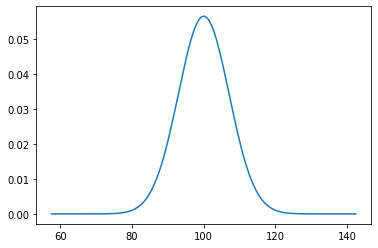

In [3]:
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
plt.plot(x, dist_test.pdf(x))
plt.show()

In [4]:
print(f'Probabilidad: {dist_test.cdf(50.5)*100} %')

Probabilidad: 1.276554301425639e-10 %


## Ítem b
Más de 50 preguntas y menos de 100

In [5]:
print(f'Probabilidad: {(dist_test.cdf(99.5)-dist_test.cdf(50.5))*100} %')

Probabilidad: 47.18140111002151 %


## Ítem c
Más de 120 preguntas

In [6]:
print(f'Probabilidad: {dist_test.sf(120.5)*100} %')

Probabilidad: 0.18709519777715605 %


## Comprobación de los resultados
Una simulación de un test se lleva a cabo y se cuenta la cantidad de respuestas correctas:

In [7]:
prueba = [random.randint(0,1) for i in range(N)]
print('Respuestas correctas:', prueba.count(1)) # es de esperar que la respuesta sea cercana a 100

Respuestas correctas: 93


# Ejercicio 2
La duración de un láser semiconductor a potencia constante tiene una distribución normal con media de 7000 horas y desviación típica de 600 horas.

In [8]:
mu = 7000 # media
sigma = 600 # desviación estándar
dist_laser = norm(loc = mu, scale = sigma) # distribución normal

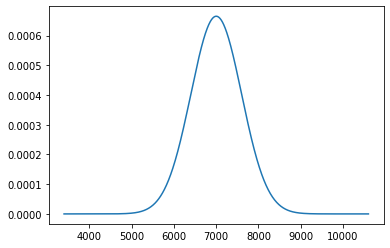

In [9]:
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
plt.plot(x, dist_laser.pdf(x))
plt.show()

## Ítem a
¿Cuál es la probabilidad de que el láser falle antes de 5000 horas?

In [10]:
print(f'Probabilidad: {dist_laser.cdf(5000)*100} %')

Probabilidad: 0.04290603331968372 %


## Ítem b
¿Cuál es la probabilidad que un láser siga funcionando después de 7000 horas?

In [11]:
print(f'Probabilidad: {dist_laser.sf(7000)*100} %')

Probabilidad: 50.0 %


## Ítem c
Si se hace uso de tres láseres en un producto y se supone que fallan de manera independiente. ¿Cuál es la probabilidad de que tres sigan funcionando después de 7.000 horas?

In [12]:
print(f'Probabilidad: {binom.pmf(3,3,dist_laser.sf(7000))*100} %')

Probabilidad: 12.500000000000004 %


# Ejercicio 3
Se producen arandelas cuyo diámetro interno está distribuido normalmente con media 0.5 pulgadas (in) y desviación estándar 0.005 in. Las arandelas se consideran defectuosas si su diámetro interno es de menos de 0.490 in o si es de más de 0.510 in.  
Si se mide el diámetro interno de una arandela al azar:

In [13]:
mu = 0.5 # media
sigma = 0.005 # desviación estándar
dist_arandelas = norm(loc = mu, scale = sigma) # distribución normal

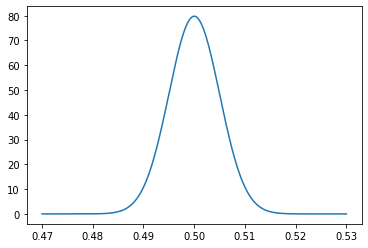

In [14]:
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
plt.plot(x, dist_arandelas.pdf(x))
plt.show()

## Ítem a
¿Cuál es la probabilidad de que no sea una defectuosa?

In [15]:
prob_defectuosa = dist_arandelas.sf(0.510)+dist_arandelas.cdf(0.490)
print(f'Probabilidad: {(1-prob_defectuosa)*100} %')

Probabilidad: 95.44997361036418 %


## Ítem b
Si se toman 10 varillas al azar, ¿cuál es la probabilidad de que exactamente 4 sean defectuosas?

In [16]:
print(f'Probabilidad: {binom.pmf(4,10,prob_defectuosa)*100} %')

Probabilidad: 0.0680659378387401 %


# Ejercicio 4
Una máquina automática llena latas de una bebida gaseosa siguiendo una distribución normal de media 0,35 l. y desviación típica 0,015 l.

In [17]:
mu = 0.35 # media
sigma = 0.015 # desviación estándar
dist_latas = norm(loc = mu, scale = sigma) # distribución normal

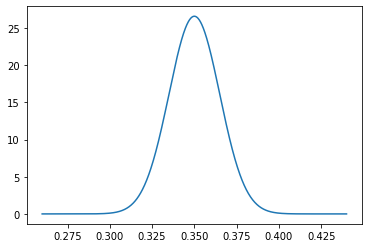

In [18]:
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
plt.plot(x, dist_latas.pdf(x))
plt.show()

## Ítem a
Si se toma una lata de gaseosa al azar, ¿cuál es la probabilidad de que esa lata contenga menos de 0,34 l. de gaseosa?

In [19]:
print(f'Probabilidad: {dist_latas.cdf(0.34)*100} %')

Probabilidad: 25.24925375469239 %


## Ítem b
Si se desechan las latas de gaseosa que contengan menos del volumen mínimo equivalente a z=-0,3. ¿Cuál es el volumen mínimo que debe tener la lata para que no sea desechada?

In [20]:
prob_rechazo = norm.cdf(-0.3)
print(f'Mínimo: {dist_latas.ppf(prob_rechazo)} litros')

Mínimo: 0.3455 litros


## Ítem c
¿cuál es la probabilidad de que tomando una lata al azar, sea una desechada?

In [21]:
print(f'Probabilidad: {prob_rechazo*100} %')

Probabilidad: 38.20885778110474 %


## Ítem d
Si se eligen 500 latas llenadas con la máquina, ¿cuál es la probabilidad de que al menos 100 sean desechadas?

In [22]:
print(f'Probabilidad: {binom.sf(100,500,prob_rechazo)*100} %')

Probabilidad: 99.99999999999999 %
